In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_13_03_2024_16_53_50.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
print(len(evaluation_data))
evaluation_data.tail(10)

1500


,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time(s),LastTokenQuery,EquivalenceQuery,Tree Depth,Inner Nodes,Accuracy_in_target,Accuracy_anywhere,IsEquivalentExact,IsEquivalentOmitZero
1490,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,1,157.246853,3048,73,3,4,1.0,1.0,True,True
1491,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,2,159.224394,3048,73,3,4,1.0,1.0,True,True
1492,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,3,156.454544,3048,73,3,4,1.0,1.0,True,True
1493,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,4,158.329122,3048,73,3,4,1.0,1.0,True,True
1494,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,5,161.065739,3048,73,3,4,1.0,1.0,True,True
1495,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,6,163.237402,3048,73,3,4,1.0,1.0,True,True
1496,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,7,160.292490,3048,73,3,4,1.0,1.0,True,True
1497,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,8,156.335694,3048,73,3,4,1.0,1.0,True,True
1498,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,9,158.605395,3048,73,3,4,1.0,1.0,True,True
1499,QuantNaryTreeLearner_Standard_Teacher_exact_te...,PDFA - 6fb8fbe8d17745c9a97296d7dae274eb,303,303,10,157.435370,3048,73,3,4,1.0,1.0,True,True


In [18]:
def nearest_value(x, values):
    return min(values, key=lambda y: abs(y - x))

evaluation_data['Nominal_Size'] = evaluation_data['Number of States'].apply(lambda x: nearest_value(x, [100,200,300] ))

In [31]:
import math

evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']

In [19]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

cols_to_agg = ['Time(s)', 'LastTokenQuery', 'EquivalenceQuery', 'Extracted Number of States', 'Accuracy_in_target', 'Accuracy_anywhere', 'TREE_SIZE']
funcs =  ['median', IQR]  
names = ['median', 'IQR']  
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Nominal_Size']).agg({x:funcs for x in cols_to_agg})
col_names = [x+"_"+fun_name for x in cols_to_agg for fun_name in names]
grouped_multiple.columns = col_names
#grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
#'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR',]
grouped_multiple.reset_index(inplace = True)

In [56]:
evaluation_data.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'TREE_SIZE', 'Nominal_Size'],
      dtype='object')

In [32]:
len(grouped_multiple)

15

In [51]:
evaluation_data_exact = evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' in str(x))]
evaluation_data_sampling =  evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' not in str(x))]

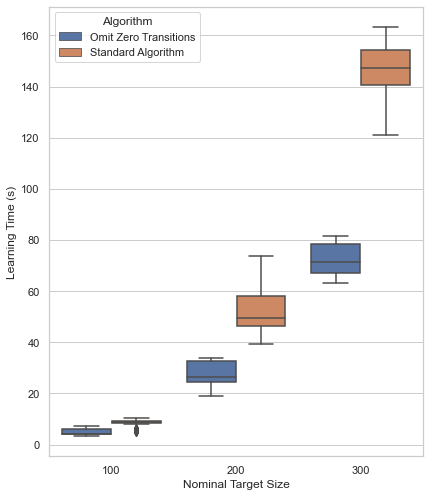

In [50]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="Time(s)", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Learning Time (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

C:\Users\franz\AppData\Local\Temp\ipykernel_23140\1111870578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_data_exact["IsEquivalentOmitZero"] = pd.to_numeric(evaluation_data_exact["IsEquivalentOmitZero"])


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

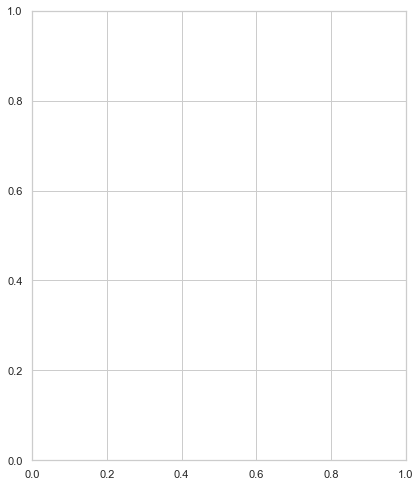

In [58]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
evaluation_data_exact["IsEquivalentOmitZero"] = pd.to_numeric(evaluation_data_exact["IsEquivalentOmitZero"])
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="IsEquivalentOmitZero", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Learning Time (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

In [62]:
evaluation_data_exact["IsEquivalentExact"].value_counts()

False    300
True     300
Name: IsEquivalentExact, dtype: int64

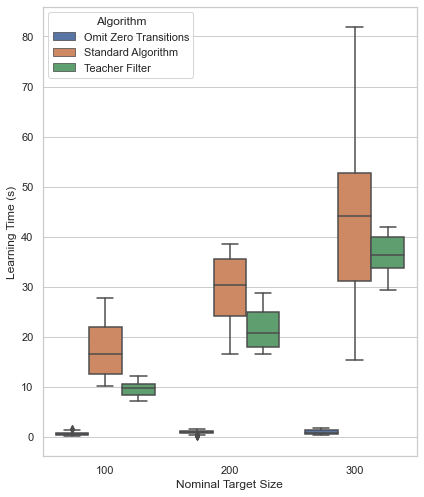

In [54]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="Time(s)", hue="Algorithm",
                 data=evaluation_data_sampling)

ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Learning Time (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Algorithm", "Teacher Filter"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

In [13]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
pivot = int(len(grouped_multiple)/5)

zero = np.array(grouped_multiple["Time(s)_median"][0:pivot])
standard = np.array(grouped_multiple["Time(s)_median"][pivot:2*pivot])
teacher_filter = np.array(grouped_multiple["Time(s)_median"][2*pivot:])

speedup_filter_vs_zero = teacher_filter/zero
speedup_standard_vs_zero = standard / zero

sns.set_style("whitegrid")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_filter_vs_zero, order=1, ci=None, label="Teacher Filter vs Omit Zero")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_standard_vs_zero, order=1, ci=None, label="Standard Teacher vs Omit Zero")
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)
ax.legend()

ValueError: operands could not be broadcast together with shapes (78,) (26,) 

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(4.631875000000001, 0.5, 'Accuracy in target median')

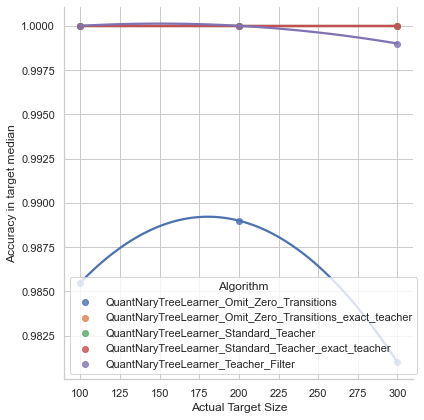

In [24]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Accuracy_in_target_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 2, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy in target median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(22.96, 0.5, 'Accuracy anywhere median')

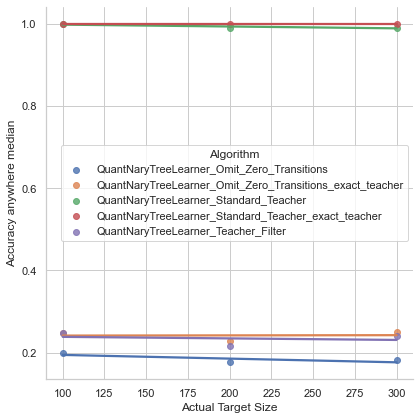

In [26]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Accuracy_anywhere_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy anywhere median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


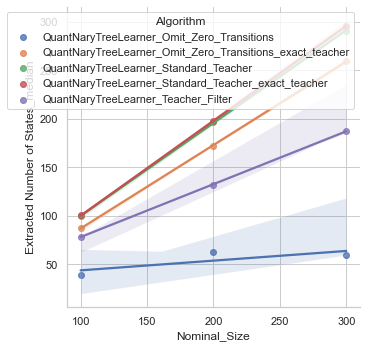

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


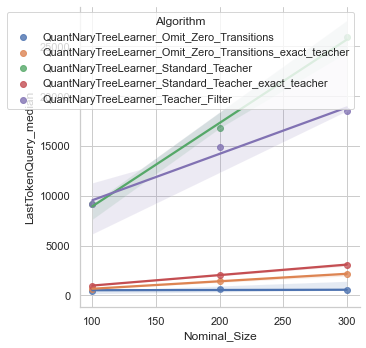

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="LastTokenQuery_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(19.96, 0.5, 'Tree Size Median')

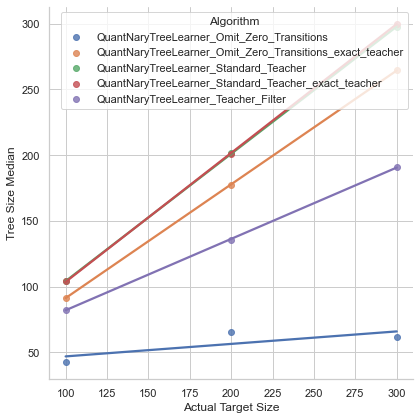

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="TREE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, ci = None, size = 6)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Tree Size Median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)